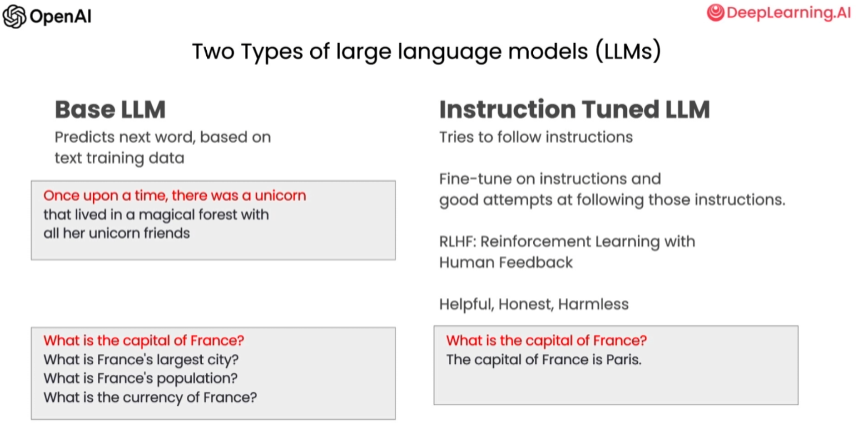

- 강의에서 교수님은 두가지 LLM을 구분합니다.
- 하나는 base-LLM, 다른 하나는 Instruction Tuned LLM 입니다. 
- BaseLLM은 그 다음 등장할 단어를 예측하는 Naive한 LLM 이고 따라서, 'What is the capital of France' 라는 질문을 했을 때 (다수의 유사 지식을 인터넷으로 부터 학습 했기 때문에) 이와 유사한 질문들을 대답으로 내놓을 가능성이 높다.
- 반면, Instruction Tuned LLM은 



<요약>
- 프롬프트 가이드
- 지속적 프롬프트 개발
- 요약/추출
- 추론/감정분석
- 

## 1. Guidelines for Prompting

<요약>
- Principle 1: Write clear and specific instructions
  - Tactic 1: Use delimiters to clearly indicate distinct parts of the input 
    - (e.g. \`\`\`{text}\`\`\` , \"\"\"{text}\"\"\")
  - Tactic 2: Ask for a structured output
    - "... \n Provide them in JSON format with the following keys: book_id, title, author, genre."""
  - Tactic 3: Ask the model to check whether conditions are satisfied
    - "... \n If the text does not contain a sequence of instructions, then simply write \"No steps provided.\""
  - Tactic 4: "Few-shot" prompting
    
  
- Principle 2: Give the model time to “think”  
  - Tactic 1: Specify the steps required to complete a task
    - Ask for output in a specified format
  - Tactic 2: Instruct the model to work out its own solution before rushing to a conclusion
    - We can fix this by instructing the model to work out its own solution first.
  - Model Limitations: Hallucinations 

# 2. Iterative Prompt Develelopment

<요약>
- Iterative Prompt Develelopment
  - e.g. refine prompt to generate marketing copy from a product fact sheet
- Issue 1: The text is too long 
  - Limit the number of words/sentences/characters.
    - e.g. " ... \n Use at most 50 words."
- Issue 2. Text focuses on the 'specific' details
  - Ask it to focus on the aspects that are relevant to the intended audience.
    - e.g. " ... \n The description is intended for furniture retailers, so should be technical in nature and focus on the materials the product is constructed from."
  - Load Python libraries to view HTML

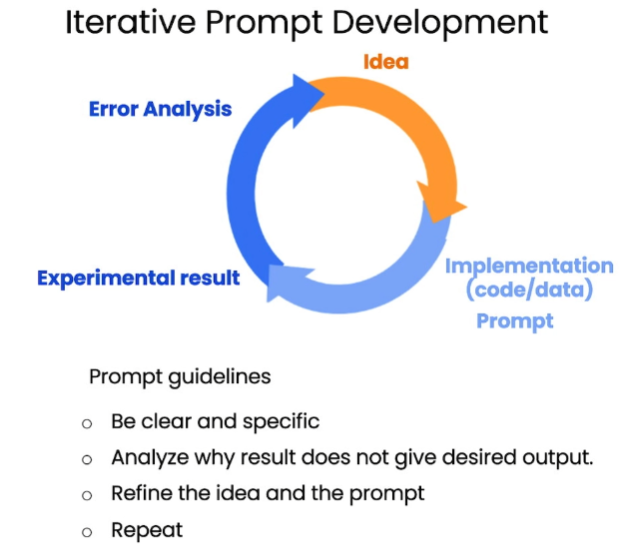

# 3. Summarizing
- 요약 하기 위한 프롬프트 생성
  - "... `Summarize` the review below, delimited by triple backticks, in at most 30 words."  : 글자 갯수 중심의 요약 유도
  - "... and focusing on any aspects that mention shipping and delivery of the product."   : 특정 부서를 위한 요약으로 변경할 수 있다.
  - "...  and focusing on any aspects that are relevant to the price and perceived value." : 가격과 인식되는 가치에 초점을 맞출 수 있다.
- 정보를 추출하기 위한 프롬프트 생성
  - "Your task is to `extract` relevant information from a product review ... " : 정보를 추출하기 위함 프롬프트 작성할 수도 있다.

# 4. Inferring

- 감정 분석(Positive/Negative)
  - "... Give your answer as a single word, either "positive" or "negative". Review text: '''{lamp_review}''' "
- 감정의 종류 분석(Identify types of emotions)
  - "Identify a list of emotions that the writer of the following review is expressing ..."
- 화남(Anger) 여부(Identify anger)
- 고객 리뷰에서 제품과 회사의 이름을 추출
- 기사로 부터 토픽(topics)를 추출
  - 혹은 반대로 쏟아지는 기사에서 특정 토픽 내용이 포함되면 알려주게 할 수도 있다.

In [ ]:
prompt = f"""
Identify the following items from the review text: 
- Sentiment (positive or negative)
- Is the reviewer expressing anger? (true or false)
- Item purchased by reviewer
- Company that made the item

The review is delimited with triple backticks. \
Format your response as a JSON object with \
"Sentiment", "Anger", "Item" and "Brand" as the keys.
If the information isn't present, use "unknown" \
as the value.
Make your response as short as possible.
Format the Anger value as a boolean.

Review text: '''{lamp_review}'''
"""
response = get_completion(prompt)
print(response)

# 5. Transforming

- 다른 언어로 번역
- Formal/Unformal한 표현
- 여러 국가 사용자로 부터 온 리뷰를 특정 나라 언어로 변역
- 톤(Tone) 변환
- Json to HTML
- 스펠링, 문법 체크

In [ ]:
from IPython.display import display, Markdown, Latex, HTML, JSON
display(HTML(response))